## IRIS CLASSIFICATION

### Aim: To develop a model that can classify iris flowers into different species based on their sepal and petal meansurements.

## Import Modules

In [32]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns

## Loading the datasets

In [33]:
df = pd.read_csv("C:/Users/saiba/Desktop/Online Internships/Codsoft/IRIS.csv")
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [34]:
df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [36]:
df['species'].value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: species, dtype: int64

## Preprocessing the Dataset

In [37]:
# check for null values
df.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

## Exploratory Data Analysis

<AxesSubplot:>

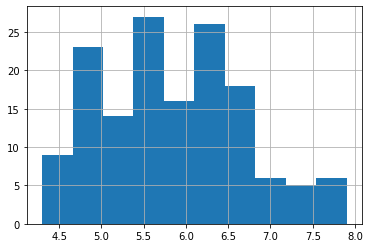

In [38]:
df['sepal_length'].hist()

In the above histogram we can see that the range between 5.3 to 5.7 is the highest sepal_length Based on the histogram you sent, the number of people in the area is relatively evenly distributed, with a slightly higher concentration in the 5.3-5.7 person range. There are no clear outliers.

<AxesSubplot:>

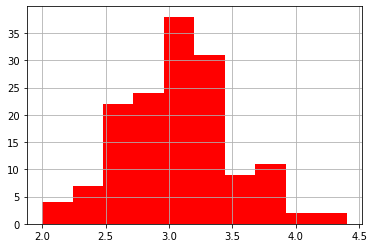

In [39]:
df['sepal_width'].hist(color="red")

Based on the histogram you sent, the number of people in the area is relatively evenly distributed, with a slightly higher concentration in the 2.5-3.0 person range. There are no clear outliers.

The number of people in the area is relatively stable and predictable.

<AxesSubplot:>

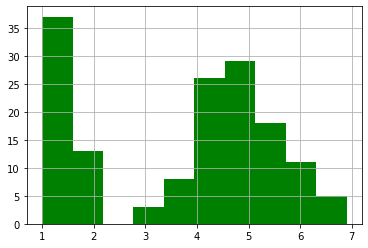

In [40]:
df['petal_length'].hist(color="green")

The most common petal length is 3 centimeters. There are three peaks in the histogram, corresponding to the three species of Iris flowers. Iris setosa flowers have the shortest petal lengths, followed by Iris versicolor flowers and Iris virginica flowers. There is some overlap in the petal lengths of the different species of Iris flowers. Overall, the histogram shows that petal length is a useful feature for distinguishing between the different species of Iris flowers, but it is not a perfect feature.

<AxesSubplot:>

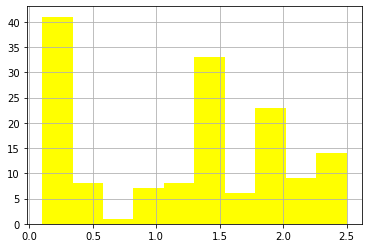

In [43]:
df['petal_width'].hist(color="yellow")

The histogram is approximately symmetric, meaning that the distribution of petal width is similar on both sides of the mean. The histogram has a single peak, meaning that the majority of irises have petal width that are close to the mean. The histogram has a long tail on the right side, meaning that there are a relatively large number of irises with petal width that are much longer than the mean. This information can be used to develop machine learning models to classify irises based on their petal length. For example, a model could be trained to identify Iris setosa irises by looking for irises with petal lengths that are shorter than 2 centimeters.

In [12]:
# scatterplot
colors = ['red','orange','blue']
species = ['Iris-setosa','Iris-versicolor','Iris-virginica']

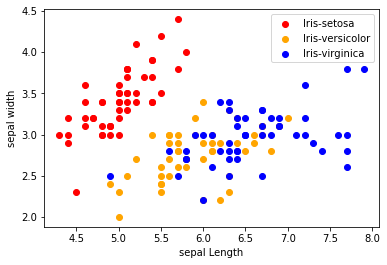

In [13]:
for i in range(3):
    x = df[df['species'] == species[i]]
    plt.scatter(x['sepal_length'],x['sepal_width'],c = colors[i],label=species[i])
plt.xlabel("sepal Length")
plt.ylabel("sepal width")
plt.legend()

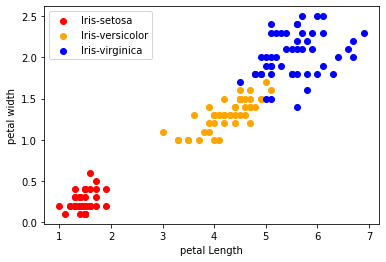

In [14]:
for i in range(3):
    x = df[df['species'] == species[i]]
    plt.scatter(x['petal_length'],x['petal_width'],c = colors[i],label=species[i])
plt.xlabel("petal Length")
plt.ylabel("petal width")
plt.legend()

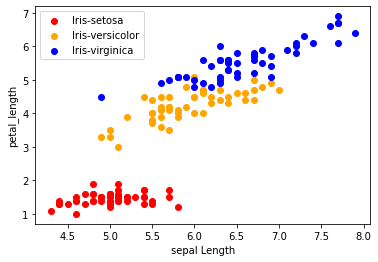

In [15]:
for i in range(3):
    x = df[df['species'] == species[i]]
    plt.scatter(x['sepal_length'],x['petal_length'],c = colors[i],label=species[i])
plt.xlabel("sepal Length")
plt.ylabel("petal_length")
plt.legend()

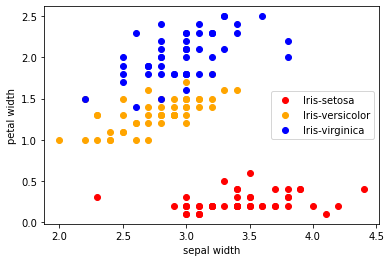

In [16]:
for i in range(3):
    x = df[df['species'] == species[i]]
    plt.scatter(x['sepal_width'],x['petal_width'],c = colors[i],label=species[i])
plt.xlabel("sepal width")
plt.ylabel("petal width")
plt.legend()

## Correlation Matrix

In [17]:
df.corr()

,sepal_length,sepal_width,petal_length,petal_width
sepal_length,1.000000,-0.109369,0.871754,0.817954
sepal_width,-0.109369,1.000000,-0.420516,-0.356544
petal_length,0.871754,-0.420516,1.000000,0.962757
petal_width,0.817954,-0.356544,0.962757,1.000000


<AxesSubplot:>

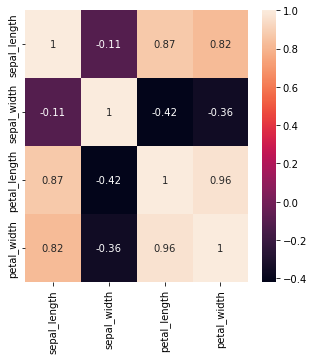

In [18]:
corr = df.corr()
fig, ax = plt.subplots(figsize=(5,5))
sns.heatmap(corr, annot=True,ax=ax)

## Label Encoder

In [19]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [20]:
df['species'] = le.fit_transform(df['species'])
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


## Model Training

In [21]:
from sklearn.model_selection import train_test_split
# train - 70
# test - 30
x = df.drop(columns=['species'])
y = df['species']
x_train,x_test,y_train,y_test = train_test_split(x, y, test_size=0.30)

In [22]:
# Logistic Regression
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()

In [23]:
# Model training
model.fit(x_train,y_train)

C:\Users\saiba\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [24]:
# print metric to get performance
print("Accuracy:",model.score(x_test,y_test) * 100)

Accuracy: 95.55555555555556


In [25]:
# Knn -K Nearest Neighbours
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier()

In [26]:
model.fit(x_train, y_train)

KNeighborsClassifier()

In [27]:
# print metric to get performance
print("Accuracy:",model.score(x_test,y_test) * 100)

Accuracy: 95.55555555555556


In [28]:
# decision Tree
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()

In [29]:
model.fit(x_train,y_train)

DecisionTreeClassifier()

In [30]:
# print metric to get performance
print("Accuracy:",model.score(x_test,y_test) * 100)

Accuracy: 93.33333333333333


I notice here that accuracy score is close to 93% which makes our model a very good performing model to predict the values accurately , here in IRIS data set our model accurately predict the classification.In conclusion, the iris flower classification is a fundamental machine learning task that showcases the effectiveness of various classification algorithms. By accurately distinguishing between iris species based on their distinct features, this task serves as a valuable benchmark for evaluating and improving classification models.